In [1]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load data from CSV file
file_path = "Dataset - Calculated_Ratios.csv"  # Update this with the path to your CSV file
data = pd.read_csv(file_path)

In [2]:
data.head()

,Companies,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,EBIDTA/ Revenue,D/A Ratio,D/E Ratio,...,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Total Expenses/ Total Revenue,Long-tern Liabilities/ Equity,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets,Label
0,ABGSHIP,-0.078,-0.178,0.001,0.001,0.902,0.34,-219.667,1.254,-4.931,...,0.000,0.576,0.801,-0.918,368.222,-3.150,0.001,0.002,0.003,1
1,Adani Enterprises,-0.054,0.026,1.822,0.967,0.829,0.67,0.026,0.775,3.250,...,0.146,0.358,0.317,0.305,0.983,1.406,1.321,2.327,1.311,0
2,Adani Green Energy,-0.009,-0.004,2.224,0.113,0.925,0.92,-0.035,0.913,10.206,...,0.000,0.130,0.125,0.099,1.137,1.436,0.127,0.148,0.128,0
3,ADHUNIK,-0.919,-0.026,0.000,0.000,0.101,0.06,-4648.000,2.001,-1.999,...,0.000,0.052,1.022,-1.116,4689.000,-1.021,0.000,0.000,0.000,1
4,ALOKTEXT,-0.128,-0.122,0.234,0.930,0.640,0.27,-0.131,3.385,-1.419,...,0.000,0.067,0.357,-3.091,1.150,-0.149,0.275,0.307,1.205,1


In [3]:
# Extract company names (assuming 'Company_Name' is the column name for company names)
company_names = data['Companies']

In [4]:
# Extract features (assuming the first column is 'Company_Name' and the rest are features)
features = data.drop(columns=['Companies','Label'])
labels=data['Label']

In [5]:
scaler=MinMaxScaler()
norm_features=scaler.fit_transform(features)

In [6]:
norm_features=pd.DataFrame(norm_features,columns=list(features.columns))

**VARIANCE THRESHOLD**

In [7]:
# Apply Variance Threshold
threshold = 0.01  # Set the variance threshold as desired
selector = VarianceThreshold(threshold=threshold)
selected_features = selector.fit_transform(norm_features)

In [8]:
# Get the selected feature columns based on the threshold
selected_feature_columns = norm_features.columns[selector.get_support()]

In [9]:
# Create a new DataFrame with selected features
selected_features_df = pd.DataFrame(selected_features, columns=selected_feature_columns)

In [10]:
# Concatenate company names with selected features
selected_data = pd.concat([company_names, selected_features_df], axis=1)

In [11]:
selected_data

,Companies,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,D/A Ratio,Equity/Tot Assets,Gross Rev/ Curr Liabilities,...,EBIDTA/ Tot Liabilities,Net Profit/ Operating Expenses,Operating Expense/ Current Liabilities,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets
0,ABGSHIP,0.968113,0.936722,0.000006,0.000302,0.109967,0.002599,0.045357,0.954643,0.000031,...,0.602344,0.064790,0.000000,0.000000,0.071102,0.028986,0.680448,0.000041,1.496110e-07,0.000166
1,Adani Enterprises,0.968964,0.957712,0.010590,0.292322,0.101018,0.005199,0.027934,0.972066,0.095318,...,0.639389,0.067519,0.092278,0.048732,0.044145,0.011383,0.705067,0.053855,1.740724e-04,0.072716
2,Adani Green Energy,0.970560,0.954625,0.012927,0.034160,0.112787,0.007168,0.032954,0.967046,0.028184,...,0.631226,0.057905,0.000000,0.000000,0.015952,0.004401,0.700920,0.005178,1.107121e-05,0.007100
3,ADHUNIK,0.938283,0.952361,0.000000,0.000000,0.011769,0.000394,0.072528,0.927472,0.000000,...,0.629343,0.130066,0.000000,0.000000,0.006306,0.037024,0.676463,0.000000,0.000000e+00,0.000000
4,ALOKTEXT,0.966339,0.942484,0.001360,0.281137,0.077847,0.002048,0.122868,0.877132,0.081429,...,0.624529,0.041875,0.000000,0.000000,0.008161,0.012838,0.636708,0.011211,2.296529e-05,0.066837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Vedanta,0.965914,0.965737,0.008079,0.224002,0.083609,0.003545,0.028807,0.971193,0.051561,...,0.661155,0.067519,0.096386,0.070427,0.050822,0.016148,0.704765,0.040360,1.846948e-04,0.059349
100,VICEROY,0.943142,0.957300,0.000076,0.116082,0.020351,0.001260,0.096243,0.903757,0.012703,...,0.633738,0.067519,0.015882,0.007009,0.007419,0.034150,0.659273,0.005911,1.675643e-05,0.025348
101,VIDEOIND,0.937077,0.942792,0.000012,0.005441,0.025377,0.000945,0.044011,0.955989,0.000468,...,0.611553,0.067515,0.002191,0.002670,0.025968,0.043861,0.693049,0.000612,2.037702e-04,0.001331
102,Wipro,0.982797,0.968001,0.039448,0.233676,0.302072,0.022450,0.012003,0.987997,0.105493,...,0.710548,0.067519,0.156900,0.129840,0.207370,0.008183,0.729564,0.093603,5.359066e-04,0.098342


In [12]:
# Save the selected features to a new CSV file
selected_data.to_csv('sf_new.csv', index=False)

**CORRELATION ANALYSIS**

In [13]:
norm_data=norm_features.copy()
norm_data['Label']=labels

In [14]:
norm_data

,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,EBIDTA/ Revenue,D/A Ratio,D/E Ratio,Equity/Tot Assets,...,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Total Expenses/ Total Revenue,Long-tern Liabilities/ Equity,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets,Label
0,0.968113,0.936722,0.000006,0.000302,0.109967,0.002599,0.952514,0.045357,0.891719,0.954643,...,0.000000,0.071102,0.028986,0.680448,0.078505,0.886010,0.000041,1.496110e-07,0.000166,1
1,0.968964,0.957712,0.010590,0.292322,0.101018,0.005199,0.999769,0.027934,0.900323,0.972066,...,0.048732,0.044145,0.011383,0.705067,0.000183,0.915449,0.053855,1.740724e-04,0.072716,0
2,0.970560,0.954625,0.012927,0.034160,0.112787,0.007168,0.999756,0.032954,0.907638,0.967046,...,0.000000,0.015952,0.004401,0.700920,0.000216,0.915643,0.005178,1.107121e-05,0.007100,0
3,0.938283,0.952361,0.000000,0.000000,0.011769,0.000394,0.000000,0.072528,0.894802,0.927472,...,0.000000,0.006306,0.037024,0.676463,1.000000,0.899767,0.000000,0.000000e+00,0.000000,1
4,0.966339,0.942484,0.001360,0.281137,0.077847,0.002048,0.999735,0.122868,0.895412,0.877132,...,0.000000,0.008161,0.012838,0.636708,0.000219,0.905401,0.011211,2.296529e-05,0.066837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.965914,0.965737,0.008079,0.224002,0.083609,0.003545,0.999794,0.028807,0.900824,0.971193,...,0.070427,0.050822,0.016148,0.704765,0.000164,0.920793,0.040360,1.846948e-04,0.059349,0
100,0.943142,0.957300,0.000076,0.116082,0.020351,0.001260,0.999775,0.096243,0.895217,0.903757,...,0.007009,0.007419,0.034150,0.659273,0.000188,0.902674,0.005911,1.675643e-05,0.025348,1
101,0.937077,0.942792,0.000012,0.005441,0.025377,0.000945,0.998333,0.044011,0.891010,0.955989,...,0.002670,0.025968,0.043861,0.693049,0.002522,0.870340,0.000612,2.037702e-04,0.001331,1
102,0.982797,0.968001,0.039448,0.233676,0.302072,0.022450,0.999798,0.012003,0.897438,0.987997,...,0.129840,0.207370,0.008183,0.729564,0.000157,0.908593,0.093603,5.359066e-04,0.098342,0


In [15]:
corr_mat=norm_data.corr()

In [16]:
corr_mat

,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,EBIDTA/ Revenue,D/A Ratio,D/E Ratio,Equity/Tot Assets,...,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Total Expenses/ Total Revenue,Long-tern Liabilities/ Equity,Revenue/Liabilities,Revenue/Short-term Liabilities,Revenue/Fixed Assets,Label
Net Working Capital/ Tot Assets,1.000000,0.857796,0.112063,0.032850,0.285410,0.069551,0.003421,-0.986025,-0.039981,0.986025,...,0.090296,0.225199,-0.996011,0.836786,-0.002699,-0.018233,0.145679,-0.493492,0.147019,-0.271055
EBIDTA/ Total Assets,0.857796,1.000000,0.111309,0.063290,0.205278,0.043261,-0.012417,-0.846687,-0.009089,0.846687,...,0.104961,0.188877,-0.853743,0.618074,0.012664,0.008109,0.154452,-0.580564,0.101362,-0.265592
Market Cap/ Total Debt,0.112063,0.111309,1.000000,0.191571,0.640197,0.344426,0.044907,-0.148144,0.029042,0.148144,...,0.144753,0.812784,-0.112743,0.151093,-0.045844,0.041275,0.583899,-0.068445,0.104172,-0.374484
Revenue/Tot Assets,0.032850,0.063290,0.191571,1.000000,0.109737,-0.066761,0.119365,-0.052492,0.065951,0.052492,...,0.244300,0.192173,-0.016586,0.082700,-0.122008,0.081787,0.551984,0.154412,0.563356,-0.187684
Current Ratio,0.285410,0.205278,0.640197,0.109737,1.000000,0.253731,0.104480,-0.273468,-0.346415,0.273468,...,0.087538,0.804722,-0.264509,0.340372,-0.104816,-0.331074,0.355327,-0.157181,0.262095,-0.450893
Quick Ratio,0.069551,0.043261,0.344426,-0.066761,0.253731,1.000000,0.024003,-0.054351,-0.022226,0.054351,...,0.011526,0.239270,-0.052891,0.160899,-0.024448,0.000151,-0.023515,-0.036979,0.284247,-0.175444
EBIDTA/ Revenue,0.003421,-0.012417,0.044907,0.119365,0.104480,0.024003,1.000000,-0.011944,-0.008296,0.011944,...,0.044041,0.089402,0.009448,0.015547,-0.999528,-0.007278,0.064165,0.024270,0.082080,-0.112999
D/A Ratio,-0.986025,-0.846687,-0.148144,-0.052492,-0.273468,-0.054351,-0.011944,1.000000,0.007323,-1.000000,...,-0.111596,-0.258009,0.984525,-0.841025,0.011695,-0.012419,-0.178655,0.482012,-0.122184,0.301367
D/E Ratio,-0.039981,-0.009089,0.029042,0.065951,-0.346415,-0.022226,-0.008296,0.007323,1.000000,-0.007323,...,0.024964,-0.022204,0.021284,0.006728,0.008322,0.981627,0.039554,0.011437,-0.117602,-0.116172
Equity/Tot Assets,0.986025,0.846687,0.148144,0.052492,0.273468,0.054351,0.011944,-1.000000,-0.007323,1.000000,...,0.111596,0.258009,-0.984525,0.841025,-0.011695,0.012419,0.178655,-0.482012,0.122184,-0.301367


In [17]:
for f in corr_mat['Label'].keys():
    if abs(corr_mat['Label'][f])<0.15:
        norm_data=norm_data.drop([f],axis=1)
        if f=='Label':
            continue

In [18]:
norm_data

,Net Working Capital/ Tot Assets,EBIDTA/ Total Assets,Market Cap/ Total Debt,Revenue/Tot Assets,Current Ratio,Quick Ratio,D/A Ratio,Equity/Tot Assets,Gross Rev/ Curr Liabilities,EBIDTA/ Assets,...,EBIDTA/ Tot Liabilities,Net Profit/ Operating Expenses,Operating Expense/ Current Liabilities,Operating Expenses/ Total Liabilities,Current Assets/ Total Liabilities,Current Liabilities/ Total Assets,Equity/Fixed Assets,Revenue/Liabilities,Revenue/Short-term Liabilities,Label
0,0.968113,0.936722,0.000006,0.000302,0.109967,0.002599,0.045357,0.954643,0.000031,0.936722,...,0.602344,0.064790,0.000000,0.000000,0.071102,0.028986,0.680448,0.000041,1.496110e-07,1
1,0.968964,0.957712,0.010590,0.292322,0.101018,0.005199,0.027934,0.972066,0.095318,0.957712,...,0.639389,0.067519,0.092278,0.048732,0.044145,0.011383,0.705067,0.053855,1.740724e-04,0
2,0.970560,0.954625,0.012927,0.034160,0.112787,0.007168,0.032954,0.967046,0.028184,0.954625,...,0.631226,0.057905,0.000000,0.000000,0.015952,0.004401,0.700920,0.005178,1.107121e-05,0
3,0.938283,0.952361,0.000000,0.000000,0.011769,0.000394,0.072528,0.927472,0.000000,0.952361,...,0.629343,0.130066,0.000000,0.000000,0.006306,0.037024,0.676463,0.000000,0.000000e+00,1
4,0.966339,0.942484,0.001360,0.281137,0.077847,0.002048,0.122868,0.877132,0.081429,0.942484,...,0.624529,0.041875,0.000000,0.000000,0.008161,0.012838,0.636708,0.011211,2.296529e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.965914,0.965737,0.008079,0.224002,0.083609,0.003545,0.028807,0.971193,0.051561,0.965737,...,0.661155,0.067519,0.096386,0.070427,0.050822,0.016148,0.704765,0.040360,1.846948e-04,0
100,0.943142,0.957300,0.000076,0.116082,0.020351,0.001260,0.096243,0.903757,0.012703,0.957300,...,0.633738,0.067519,0.015882,0.007009,0.007419,0.034150,0.659273,0.005911,1.675643e-05,1
101,0.937077,0.942792,0.000012,0.005441,0.025377,0.000945,0.044011,0.955989,0.000468,0.942792,...,0.611553,0.067515,0.002191,0.002670,0.025968,0.043861,0.693049,0.000612,2.037702e-04,1
102,0.982797,0.968001,0.039448,0.233676,0.302072,0.022450,0.012003,0.987997,0.105493,0.968001,...,0.710548,0.067519,0.156900,0.129840,0.207370,0.008183,0.729564,0.093603,5.359066e-04,0


In [19]:
selected_features1=list(norm_data)
selected_features1.remove('Label')
selected_features1

['Net Working Capital/ Tot Assets',
 'EBIDTA/ Total Assets',
 'Market Cap/ Total Debt',
 'Revenue/Tot Assets',
 'Current Ratio',
 'Quick Ratio',
 'D/A Ratio',
 'Equity/Tot Assets',
 'Gross Rev/ Curr Liabilities',
 'EBIDTA/ Assets',
 'Equity-ShareCapital/ Total Assets',
 'EBIDTA/ Tot Liabilities',
 'Net Profit/ Operating Expenses',
 'Operating Expense/ Current Liabilities',
 'Operating Expenses/ Total Liabilities',
 'Current Assets/ Total Liabilities',
 'Current Liabilities/ Total Assets',
 'Equity/Fixed Assets',
 'Revenue/Liabilities',
 'Revenue/Short-term Liabilities']

**INFORMATION GAIN**

In [20]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(norm_features, labels)

# Print information gain for each feature
for i, gain in enumerate(info_gain):
    print(f"Feature {i + 1}: {gain}")

# Select the top k features based on information gain
k = 19
top_k_indices = np.argsort(info_gain)[::-1][:k]
print(top_k_indices)
# Extract the selected features
selected_features2 = []
for i in top_k_indices:
    selected_features2.append(norm_features.columns[i])

selected_features2

df3=pd.DataFrame(norm_features,columns=selected_features2)
df3

Feature 1: 0.28375116008461854
Feature 2: 0.4168324321390835
Feature 3: 0.3653855876686265
Feature 4: 0.0678448871350017
Feature 5: 0.2362874582642247
Feature 6: 0.3565979333102023
Feature 7: 0.4478746710541943
Feature 8: 0.2996167995292478
Feature 9: 0.30382036058481554
Feature 10: 0.2996167995292478
Feature 11: 0.22249804977400278
Feature 12: 0.41041454447119574
Feature 13: 0.358414422346647
Feature 14: 0.4539782363097744
Feature 15: 0.4870354600478266
Feature 16: 0.2770873429958556
Feature 17: 0.45021866069545524
Feature 18: 0.049936699245121785
Feature 19: 0.1196904087527162
Feature 20: 0.15059369132917788
Feature 21: 0.26492001117659436
Feature 22: 0.35865730457057343
Feature 23: 0.4461000367373502
Feature 24: 0.38622232316485006
Feature 25: 0.26636330081388704
Feature 26: 0.05597172500433789
Feature 27: 0.05968326453318484
[14 13 16  6 22  1 11 23  2 21 12  5  8  7  9  0 15 24 20]


,Net Profit/ Operating Expenses,EBIDTA/ Tot Liabilities,EBIT/Sales,EBIDTA/ Revenue,Total Expenses/ Total Revenue,EBIDTA/ Total Assets,EBIDTA/ Assets,Long-tern Liabilities/ Equity,Market Cap/ Total Debt,Equity/Fixed Assets,Equity-ShareCapital/ Total Assets,Quick Ratio,D/E Ratio,D/A Ratio,Equity/Tot Assets,Net Working Capital/ Tot Assets,Total Liabilities -Cash/ Sales,Revenue/Liabilities,Current Liabilities/ Total Assets
0,0.064790,0.602344,0.920776,0.952514,0.078505,0.936722,0.936722,0.886010,0.000006,0.680448,0.953678,0.002599,0.891719,0.045357,0.954643,0.968113,4.259940e-03,0.000041,0.028986
1,0.067519,0.639389,0.999769,0.999769,0.000183,0.957712,0.957712,0.915449,0.010590,0.705067,0.972214,0.005199,0.900323,0.027934,0.972066,0.968964,1.955746e-06,0.053855,0.011383
2,0.057905,0.631226,0.999756,0.999756,0.000216,0.954625,0.954625,0.915643,0.012927,0.700920,0.966433,0.007168,0.907638,0.032954,0.967046,0.970560,2.130297e-05,0.005178,0.004401
3,0.130066,0.629343,0.000000,0.000000,1.000000,0.952361,0.952361,0.899767,0.000000,0.676463,0.925495,0.000394,0.894802,0.072528,0.927472,0.938283,1.000000e+00,0.000000,0.037024
4,0.041875,0.624529,0.999735,0.999735,0.000219,0.942484,0.942484,0.905401,0.001360,0.636708,0.874223,0.002048,0.895412,0.122868,0.877132,0.966339,9.964067e-06,0.011211,0.012838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.067519,0.661155,0.999794,0.999794,0.000164,0.965737,0.965737,0.920793,0.008079,0.704765,0.971311,0.003545,0.900824,0.028807,0.971193,0.965914,2.564323e-06,0.040360,0.016148
100,0.067519,0.633738,0.999775,0.999775,0.000188,0.957300,0.957300,0.902674,0.000076,0.659273,0.898071,0.001260,0.895217,0.096243,0.903757,0.943142,1.833477e-05,0.005911,0.034150
101,0.067515,0.611553,0.998333,0.998333,0.002522,0.942792,0.942792,0.870340,0.000012,0.693049,0.956027,0.000945,0.891010,0.044011,0.955989,0.937077,1.876603e-04,0.000612,0.043861
102,0.067519,0.710548,0.999798,0.999798,0.000157,0.968001,0.968001,0.908593,0.039448,0.729564,0.987751,0.022450,0.897438,0.012003,0.987997,0.982797,8.243454e-07,0.093603,0.008183


**COMMON SELECTED FEATURES**

In [21]:
sf1=set(selected_feature_columns)
sf2=set(selected_features1)
sf3=set(selected_features2)
final_features=list(sf1.intersection(sf2).intersection(sf3))
final_columns=final_features
final_columns=final_columns.append('Label')
print(final_features)

['Market Cap/ Total Debt', 'Quick Ratio', 'Current Liabilities/ Total Assets', 'Net Profit/ Operating Expenses', 'EBIDTA/ Tot Liabilities', 'Equity/Fixed Assets', 'EBIDTA/ Assets', 'EBIDTA/ Total Assets', 'Revenue/Liabilities', 'Equity-ShareCapital/ Total Assets', 'Net Working Capital/ Tot Assets', 'D/A Ratio', 'Equity/Tot Assets', 'Label']


**TRAIN-TEST SPLIT**

In [22]:
final_data=norm_data[final_features]
train_data=final_data.loc[0:80]
test_data=final_data.loc[81:]
x_train=train_data.drop('Label',axis=1)
y_train=train_data['Label']
x_test=test_data.drop('Label',axis=1)
y_test=test_data['Label']

**RANDOM FOREST CLASSIFIER**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

In [24]:
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Random Forest Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Random Forest Classifier
Accuracy :  91.30434782608695 %
Sensitivity :  91.66666666666666 %
Specificity :  90.9090909090909 %
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [25]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RANDOM FOREST CLASSIFIER')

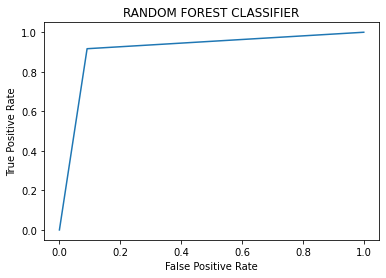

In [26]:
plot_roc_curve(y_test,y_pred)

**SVM CLASSIFIER**

In [27]:
from sklearn.svm import SVC  

In [28]:
clf = SVC(kernel='poly') 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("SVM Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

SVM Classifier
Accuracy :  91.30434782608695 %
Sensitivity :  100.0 %
Specificity :  81.81818181818183 %
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.86      1.00      0.92        12

    accuracy                           0.91        23
   macro avg       0.93      0.91      0.91        23
weighted avg       0.93      0.91      0.91        23



In [29]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('SVM CLASSIFIER')

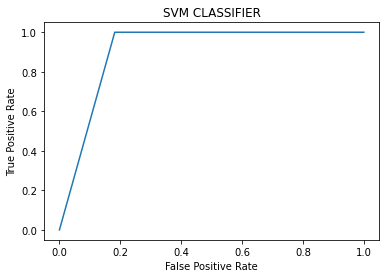

In [30]:
plot_roc_curve(y_test,y_pred)

**XGBOOST CLASSIFIER**

In [31]:
from xgboost import XGBClassifier

In [32]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("XG Boost Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

XG Boost Classifier
Accuracy :  91.30434782608695 %
Sensitivity :  91.66666666666666 %
Specificity :  90.9090909090909 %
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [34]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XG Boost CLASSIFIER')

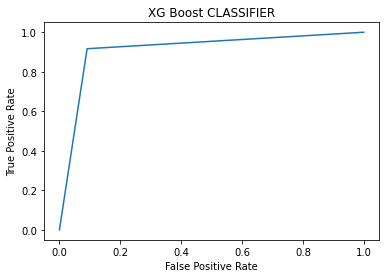

In [35]:
plot_roc_curve(y_test,y_pred)

**DECISION TREE CLASSIFIER**

In [36]:
from sklearn import tree

In [37]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Decision Tree Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Decision Tree Classifier
Accuracy :  91.30434782608695 %
Sensitivity :  91.66666666666666 %
Specificity :  90.9090909090909 %
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [38]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree  CLASSIFIER')

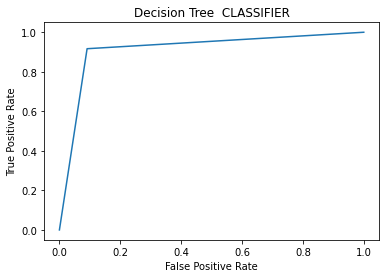

In [39]:
plot_roc_curve(y_test,y_pred)

**ADABOOST CLASSIFIER**


In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Adaboost Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Adaboost Classifier
Accuracy :  95.65217391304348 %
Sensitivity :  91.66666666666666 %
Specificity :  100.0 %
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.92      0.96        12

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



In [42]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Adaboost Classifier')

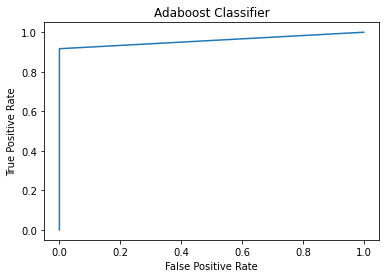

In [44]:
plot_roc_curve(y_test,y_pred)

**LOGISTIC REGRESSION**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

print("Logistic Regression Model")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) * 100, "%")
print("Sensitivity: ", metrics.recall_score(y_test, y_pred) * 100, "%")
print("Specificity: ", metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred)) * 100, "%")  # ~y is the negation of y
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Logistic Regression Model
Accuracy:  73.91304347826086 %
Sensitivity:  100.0 %
Specificity:  45.45454545454545 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.67      1.00      0.80        12

    accuracy                           0.74        23
   macro avg       0.83      0.73      0.71        23
weighted avg       0.83      0.74      0.72        23



In [46]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression')

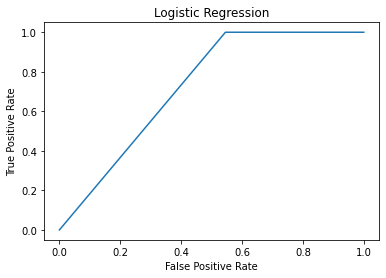

In [48]:
plot_roc_curve(y_test,y_pred)

**K-NEAREST NEIGHBORS ALGORITHM**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

# Assuming x_train, x_test, y_train, y_test are already defined

# Standardize features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors

# Fit the model to the training data
knn.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test_scaled)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred) * 100, "%")
print("Sensitivity: ", metrics.recall_score(y_test, y_pred) * 100, "%")
print("Specificity: ", metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred)) * 100, "%")  # ~y is the negation of y
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

K-Nearest Neighbors (KNN) Model
Accuracy:  91.30434782608695 %
Sensitivity:  91.66666666666666 %
Specificity:  90.9090909090909 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [50]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN')

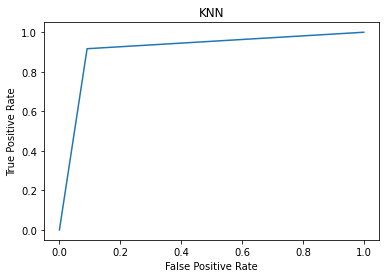

In [51]:
plot_roc_curve(y_test,y_pred)

**GAUSSIAN NAIVE BAYES CLASSIFIER**

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training set
gnb.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(x_test)



In [54]:
print("Gaussian Naive Bayes Classifier")
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")
print("Sensitivity : ", metrics.recall_score(y_test , y_pred)*100,"%")
print("Specificity : ", metrics.recall_score(np.logical_not(y_test) ,np.logical_not(y_pred))*100,"%")
print("Classification Report : ")
print(metrics.classification_report(y_test, y_pred))

Gaussian Naive Bayes Classifier
Accuracy :  91.30434782608695 %
Sensitivity :  83.33333333333334 %
Specificity :  100.0 %
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.83      0.91        12

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23



In [55]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('GAUSIAN NAIVE BAYES CLASSIFIER')

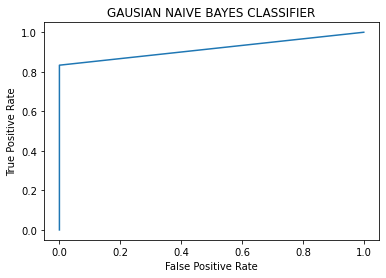

In [56]:
plot_roc_curve(y_test,y_pred)

**LIGHT GBM**

In [58]:
!pip install lightgbm


   ---------------------------------------- 1.3/1.3 MB 2.2 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import lightgbm as lgb

In [60]:
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
params = {
    'objective': 'multiclass',
    'num_class': 2,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions on the testing set
y_pred = model.predict(x_test, num_iteration=model.best_iteration)
y_pred_class = [int(pred.argmax()) for pred in y_pred]

print("Light GBM")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_class) * 100, "%")
print("Sensitivity: ", metrics.recall_score(y_test, y_pred_class) * 100, "%")
print("Specificity: ", metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred_class)) * 100, "%")  # ~y is the negation of y
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred_class))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.839101
[LightGBM] [Info] Start training from score -0.565808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

Accuracy:  91.30434782608695 %
Sensitivity:  91.66666666666666 %
Specificity:  90.9090909090909 %
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.92      0.92        12

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [63]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Light GBM Classifier')

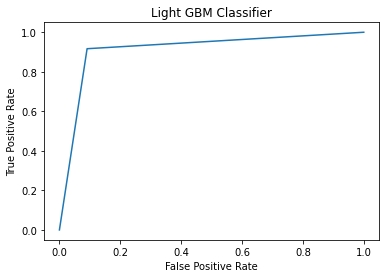

In [64]:
plot_roc_curve(y_test,y_pred_class)